# **CASE: CARTEIRA DE CLIENTES**

---

### Instalação de bibliotecas

In [ ]:
# Para teste de estacionariedade
install.packages("urca")
# Para ajuste automático de modelo ARIMA e realização de previsões
install.packages("forecast")

### Carregamento de bibliotecas

In [1]:
library(urca)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Leitura da base de dados

In [2]:
dados_clientes <- read.table(file = "../Dados/Carteira_Clientes.txt",
                             sep = "\t",
                             dec = ".",
                             header = TRUE)

### Visualização da base de dados

In [3]:
View(dados_clientes)

MES,QTDE_CLIENTES
<chr>,<int>
2019-05,685
2019-06,359
2019-07,312
2019-08,622
2019-09,884
2019-10,844
2019-11,298
2019-12,660
2020-01,1231


### Definição da série

In [4]:
serie <- ts(dados_clientes$QTDE_CLIENTES,
            start = c(2019, 5),
            end = c(2023, 4),
            frequency = 12)

### Análise exploratória da série

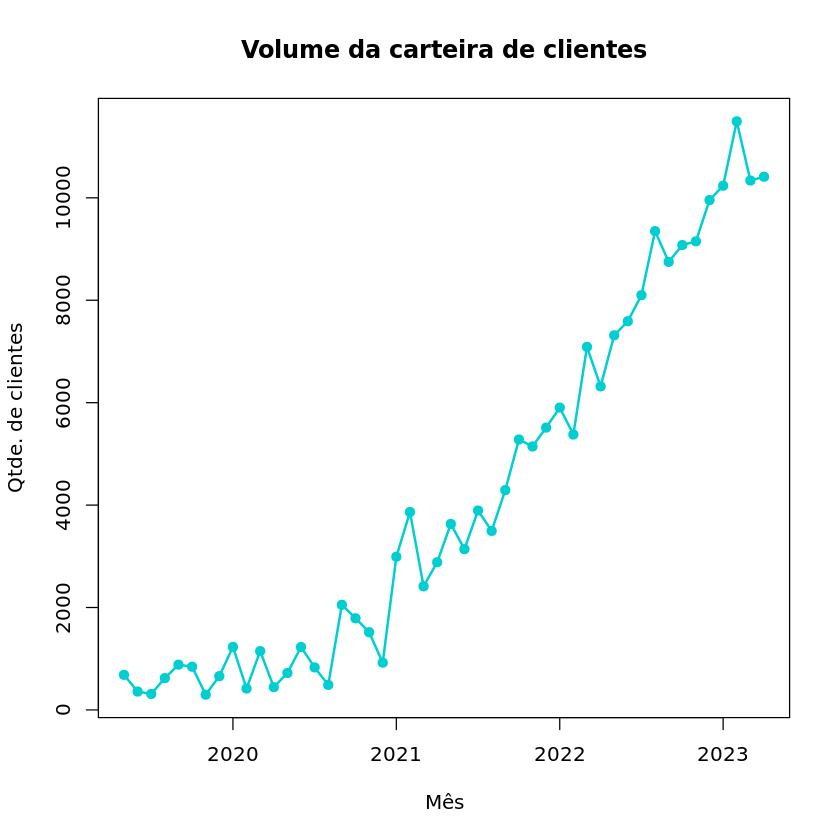

In [5]:
# Gráfico da série
plot(serie,
     type = "l",
     lwd = 2,
     col = "darkturquoise",
     main = "Volume da carteira de clientes",
     xlab = "Mês",
     ylab = "Qtde. de clientes")
points(serie,
       pch = 19,
       col = "darkturquoise")

In [6]:
# Teste de estacionariedade de Dickey-Fuller Generalizado (DF-GLS)
teste <- ur.ers(serie)
summary(teste)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
    Min      1Q  Median      3Q     Max 
-1052.2  -363.6   241.0   665.4  1713.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
yd.lag        0.04378    0.04511   0.971   0.3378  
yd.diff.lag1 -0.41848    0.17727  -2.361   0.0235 *
yd.diff.lag2 -0.17411    0.19859  -0.877   0.3861  
yd.diff.lag3  0.11218    0.19470   0.576   0.5679  
yd.diff.lag4  0.16354    0.17744   0.922   0.3625  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 774.1 on 38 degrees of freedom
Multiple R-squared:  0.1759,	Adjusted R-squared:  0.06746 
F-statistic: 1.622 on 5 and 38 DF,  p-value: 0.1777


Value of test-statistic is: 0.9707 

Critical values of DF-GLS are:
               

In [7]:
# Verificação de se é possível rejeitar a hipótese nula de não estacionariedade (TRUE representa sim, FALSE representa não)
teste@teststat < teste@cval

,1pct,5pct,10pct
critical values,FALSE,FALSE,FALSE


### Identificação do modelo da classe (S)ARIMA

In [8]:
# Ajuste do melhor modelo
modelo <- auto.arima(serie)
print(modelo)

Series: serie 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1     ma2
      0.9736  -1.6951  0.7852
s.e.  0.0391   0.1266  0.0977

sigma^2 = 391955:  log likelihood = -369.02
AIC=746.05   AICc=747   BIC=753.45


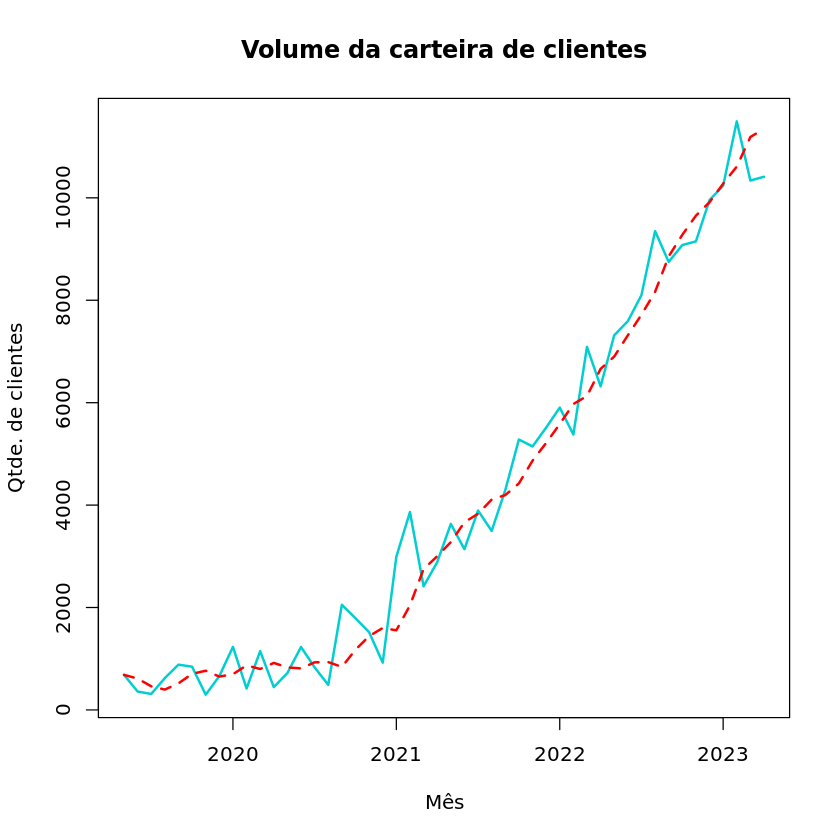

In [9]:
# Gráfico dos valores observados da série versus valores preditos pelo modelo
plot(serie,
     type = "l",
     lwd = 2,
     col = "darkturquoise",
     main = "Volume da carteira de clientes",
     xlab = "Mês",
     ylab = "Qtde. de clientes")
points(modelo$fitted,
       type = "l",
       lwd = 2,
       lty = 2,
       col = "red")

### Diagnóstico do modelo

In [10]:
# Cálculo do REQM
sqrt(mean(modelo$residuals^2))

[1] 599.4094

### Previsões do modelo





In [11]:
# Previsões para o próximo mês
previsoes <- forecast(modelo, h = 1)
round(previsoes$mean, 2)

,May
2023,11402.87


In [ ]:
# Gráfico da série, incluindo previsão
plot(previsoes,
     type = "l",
     lwd = 2,
     col = "darkturquoise",
     main = "Volume da carteira de clientes",
     xlab = "Mês",
     ylab = "Qtde. de clientes")